# Correlation with target variable

We focus on each vehicle finding the correlation between 18 features and the target variable.

Each country as seperate table. Each row is the vehicle (17 rows) and rows are correlation with the target variables

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
df = pd.read_csv("../Data/kitCapstoneJan24_data.csv", delimiter=";")
interal_data = df.filter(regex='vehiclegroup')
external_data = pd.read_csv("../Data/CountryA__external_data.csv", delimiter=";")
interal_data.head()

,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_actuals_monthly__vehiclegroup02__orderintake,sales_actuals_monthly__vehiclegroup02__retail,sales_actuals_monthly__vehiclegroup03__orderintake,sales_actuals_monthly__vehiclegroup03__retail,sales_actuals_monthly__vehiclegroup04__orderintake,sales_actuals_monthly__vehiclegroup04__retail,sales_actuals_monthly__vehiclegroup05__orderintake,sales_actuals_monthly__vehiclegroup05__retail,...,quota__vehiclegroup55__aq,quota__vehiclegroup56__aq,quota__vehiclegroup57__aq,quota__vehiclegroup58__aq,quota__vehiclegroup59__aq,quota__vehiclegroup60__aq,quota__vehiclegroup61__aq,quota__vehiclegroup62__aq,quota__vehiclegroup63__aq,quota__vehiclegroup64__aq
0,296.0,352.0,739.0,471.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,414.0,372.0,904.0,528.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,405.0,604.0,1000.0,953.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,359.0,483.0,828.0,972.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,403.0,474.0,594.0,900.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filter out only vehicle group 01 of country A
Note: Later generalize to group 02 -> 06

In [3]:
veh_group = "vehiclegroup01"
country = "Country A"

In [4]:
tiny_data = interal_data.loc[df["countryname"] == country, :].filter(regex=veh_group)
tiny_data.columns = [col.replace(veh_group + '__', '') for col in tiny_data.columns] # remove veh_group from col name
tiny_data.shape

(360, 18)

In [5]:
target = tiny_data["sales_actuals_monthly__orderintake"]

In [6]:
tiny_data.describe()

,sales_actuals_monthly__orderintake,sales_actuals_monthly__retail,sales_flow_monthly__cp8,sales_stock_monthly__physical,sales_stock_monthly__grossall,sales_stock_monthly__netimporteranddealer,customer_vehicle_relationships__terminated_cars,customer_vehicle_relationships__active_cars,leads__won,leads__first_touch_point,leads__lost,leasing_contracts__end,leasing_contracts__start,premises__flag_order_start,premises__in_sales,premises__flag_production_start,premises__in_production,quota__aq
count,258.000000,258.000000,112.000000,102.000000,102.000000,102.000000,258.000000,258.000000,200.00000,200.00000,200.000000,336.000000,336.000000,215.000000,215.000000,215.000000,215.000000,188.000000
mean,296.325581,376.798450,241.535714,419.686275,478.284314,484.637255,219.844961,389.418605,326.22000,112.70000,116.215000,337.836310,223.160714,55.041860,243.772093,57.209302,373.976744,293.585106
std,110.462041,165.625562,161.313635,275.283975,159.048618,217.925766,122.549248,193.688815,234.32538,97.51995,108.148087,172.628045,153.103431,163.340231,266.305722,136.825245,164.515302,131.749674
min,40.000000,58.000000,2.000000,0.000000,109.000000,73.000000,0.000000,25.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,217.000000,256.000000,117.000000,260.000000,363.250000,369.250000,129.500000,246.500000,121.00000,50.75000,48.500000,230.000000,133.250000,0.000000,0.000000,0.000000,256.000000,224.750000
50%,281.000000,347.500000,259.500000,448.500000,466.000000,467.000000,223.500000,344.500000,341.00000,106.50000,102.000000,347.000000,219.000000,0.000000,111.000000,0.000000,385.000000,294.000000
75%,352.500000,483.750000,327.250000,619.750000,568.500000,595.000000,305.500000,504.250000,468.75000,158.00000,169.250000,448.000000,321.500000,0.000000,444.000000,100.000000,487.000000,365.250000
max,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,564.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000


In [7]:
tiny_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360 entries, 0 to 359
Data columns (total 18 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   sales_actuals_monthly__orderintake               258 non-null    float64
 1   sales_actuals_monthly__retail                    258 non-null    float64
 2   sales_flow_monthly__cp8                          112 non-null    float64
 3   sales_stock_monthly__physical                    102 non-null    float64
 4   sales_stock_monthly__grossall                    102 non-null    float64
 5   sales_stock_monthly__netimporteranddealer        102 non-null    float64
 6   customer_vehicle_relationships__terminated_cars  258 non-null    float64
 7   customer_vehicle_relationships__active_cars      258 non-null    float64
 8   leads__won                                       200 non-null    float64
 9   leads__first_touch_point             

### Amount of missing data

In [8]:
missing_counts = tiny_data.isnull().sum()

# Calculate percentage of missing data in each column
total_rows = len(tiny_data)
missing_percentages = (missing_counts / total_rows) * 100

# Create a DataFrame to display the results
missing_data_summary = pd.DataFrame({
    'missing_count': missing_counts,
    'missing_per': round(missing_percentages)
})

missing_data_summary.sort_values(by='missing_per', inplace=True)
missing_data_summary

,missing_count,missing_per
leasing_contracts__start,24,7.0
leasing_contracts__end,24,7.0
sales_actuals_monthly__orderintake,102,28.0
sales_actuals_monthly__retail,102,28.0
customer_vehicle_relationships__terminated_cars,102,28.0
customer_vehicle_relationships__active_cars,102,28.0
premises__flag_production_start,145,40.0
premises__in_sales,145,40.0
premises__flag_order_start,145,40.0
premises__in_production,145,40.0


In [9]:
# num_cols = 4
# num_rows = 5

# plt.figure(figsize=(20, 10))
# for i, col in enumerate(missing_data_summary.index):
#     plt.subplot(num_rows, num_cols, i + 1)
#     sns.histplot(tiny_data[col], color="lightblue") # drop na values only when visualize

#     mean_val = tiny_data[col].mean()
#     median_val = tiny_data[col].median()
    
#     # Add vertical lines for mean and median
#     plt.axvline(x=mean_val, color='red', linestyle='--', linewidth=3, label='Mean')
#     plt.axvline(x=median_val, color='black', linestyle='--', linewidth=3, alpha=.7, label='Median')

#     plt.xlabel("")
#     plt.title(col + f" ({int(missing_data_summary.loc[col, 'missing_per'])}% NA)", fontsize=10)

# plt.tight_layout()
# plt.suptitle("Distrubtion plot of variable", fontsize=16)
# plt.subplots_adjust(top=0.9)
# plt.legend()
# plt.show()

/Users/duy/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/duy/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/duy/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/duy/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

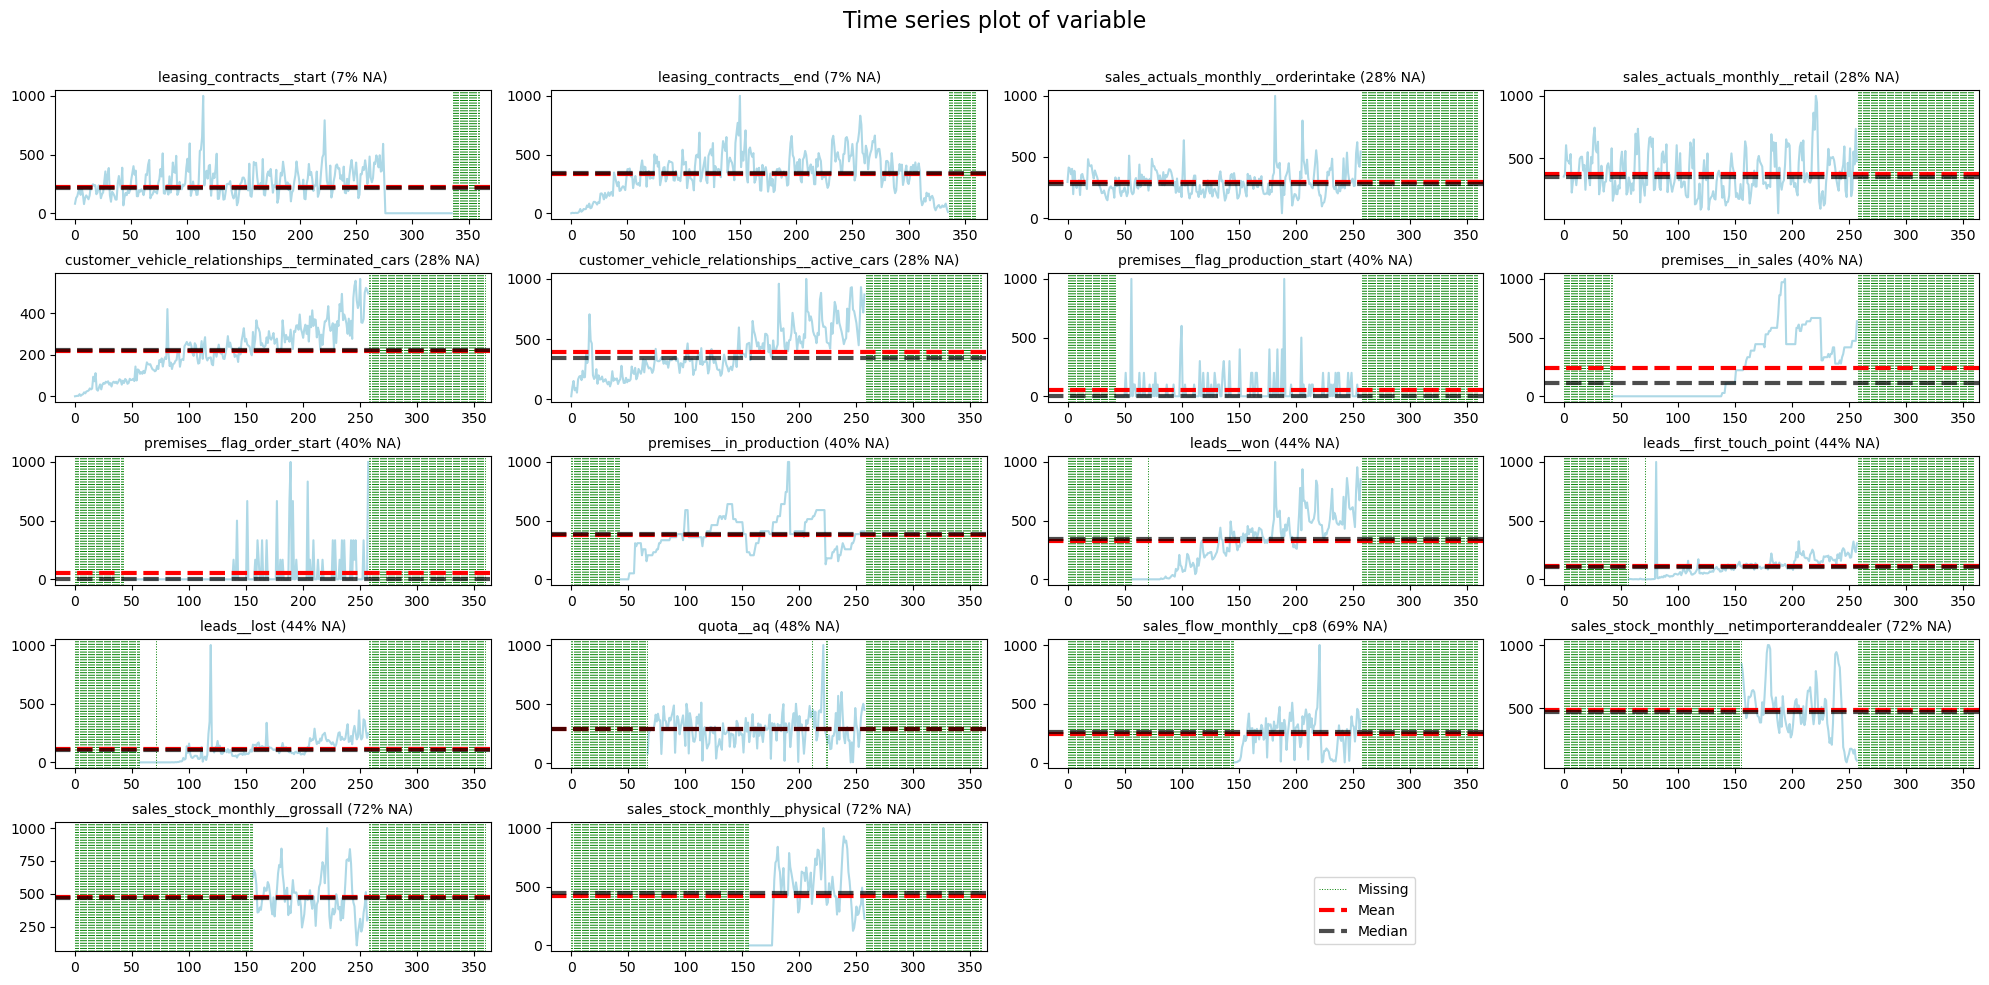

In [10]:
num_cols = 4
num_rows = 5

plt.figure(figsize=(20, 10))
for i, col in enumerate(missing_data_summary.index):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.lineplot(tiny_data[col], color="lightblue") # drop na values only when visualize

    mean_val = tiny_data[col].mean()
    median_val = tiny_data[col].median()
    
    # Vertical line for missing position
    missing_indices = tiny_data[col][tiny_data[col].isnull()].index
    plt.axvline(x=missing_indices[0], color='green', linestyle=':', linewidth=0.7, label="Missing")
    for missing_index in missing_indices[1:]:
        plt.axvline(x=missing_index, color='green', linestyle=':', linewidth=0.7)  

    # Add vertical lines for mean and median
    plt.axhline(y=mean_val, color='red', linestyle='--', linewidth=3, label='Mean')
    plt.axhline(y=median_val, color='black', linestyle='--', linewidth=3, alpha=.7, label='Median')

    plt.ylabel("")
    plt.title(col + f" ({int(missing_data_summary.loc[col, 'missing_per'])}% NA)", fontsize=10)

plt.tight_layout()
plt.suptitle("Time series plot of variable", fontsize=16)
plt.subplots_adjust(top=0.9)
plt.legend(loc='lower right', bbox_to_anchor=(2, 0), ncol=1)
plt.show()

### Check for autocorrelation

In [11]:
# from matplotlib import pyplot
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# plot_acf(target.diff(12).dropna(), lags=50)
# plot_pacf(target.diff(12).dropna(), lags=50)
# pyplot.show()

# from statsmodels.tsa.stattools import adfuller
# from numpy import log
# result = adfuller(target.dropna())
# print('ADF Statistic: %f' % result[0])
# print('p-value: %f' % result[1])

In [12]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# result = seasonal_decompose(target.dropna(), model='additive', period=12)
# plt.figure(figsize=(20,6))
# result.plot()
# plt.show()

In [13]:
p = 1
q = 2
# ARIMA(p,d,q) = (1,0,2)

In [29]:
exo_data = tiny_data.loc[:, ["sales_actuals_monthly__orderintake", "leasing_contracts__end"]].dropna(axis=0) # "leasing_contracts__start"
start_date = '2024-01-01'
start_date = pd.to_datetime(start_date)
exo_data.index = pd.date_range(start=start_date, periods=len(exo_data), freq='MS')
exo_data

,sales_actuals_monthly__orderintake,leasing_contracts__end
2024-01-01,296.0,0.0
2024-02-01,414.0,4.0
2024-03-01,405.0,2.0
2024-04-01,359.0,2.0
2024-05-01,403.0,4.0
...,...,...
2045-02-01,531.0,319.0
2045-03-01,621.0,592.0
2045-04-01,451.0,615.0
2045-05-01,420.0,693.0


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2708.169, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2646.868, Time=0.17 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2666.945, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3181.380, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2658.246, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=2619.463, Time=0.44 sec
 ARIMA(1,0,0)(3,0,0)[12] intercept   : AIC=2623.323, Time=2.78 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=2628.208, Time=0.70 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=2652.328, Time=0.32 sec
 ARIMA(1,0,0)(3,0,1)[12] intercept   : AIC=inf, Time=3.30 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=2673.726, Time=0.37 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=2619.085, Time=0.58 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=2646.608, Time=0.19 sec
 ARIMA(2,0,0)(3,0,0)[12] intercept   : AIC=2635.435, Time=3.37 sec
 ARIMA(2,0,0)(2,0,1)[12]

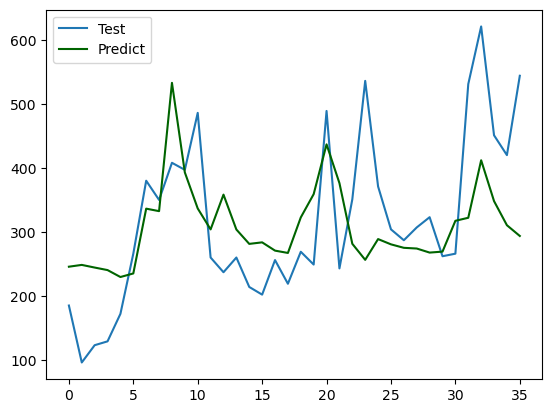

In [30]:
import pmdarima as pm

def SARIMAX(n_periods = 18, exo = True):
    y_train = exo_data.iloc[:-n_periods, 0]
    y_test = exo_data.iloc[-n_periods:, 0]

    if exo:
        exogenous_data_train = exo_data.iloc[:-n_periods, 1:]
        exogenous_data_test = exo_data.iloc[-n_periods:, 1:]    
    else:
        exogenous_data_train = None
        exogenous_data_test = None

    sxmodel = pm.auto_arima(y=y_train, # target
                            X=exogenous_data_train, # data
                            start_p=0, max_p=5,
                            start_q=0, max_q=5, # maximum p and q
                            start_P=0, max_P=5,
                            start_Q=0, max_Q=5, 
                            d=None,              # usual differencing
                            D=None,              # seasonal differencing
                            seasonal=True,   # Seasonality
                            m=12,              # frequency of series
                            test='adf',       # use adftest to find optimal 'd'
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True,
                            #max_order=10,
                            scoring='mse', # mae/mse
                            stepwise=True)
    print(sxmodel.summary())

    y_predict, _ = sxmodel.predict(n_periods=n_periods, X=exogenous_data_test, return_conf_int=True)
    print(f"Period = {n_periods}.", "MAPE score is", mean_absolute_percentage_error(y_test, y_predict))
    plt.plot(y_test.to_list(), label="Test")
    plt.plot(y_predict.to_list(), color='darkgreen', label="Predict")
    plt.legend()
    plt.show()

SARIMAX(n_periods = 36, exo=False)

In [16]:
from sklearn.inspection import permutation_importance
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=4, gap=6, test_size=18)

non_na_data = tiny_data.dropna()
X_in = non_na_data.drop("sales_actuals_monthly__orderintake", axis=1)
y = non_na_data["sales_actuals_monthly__orderintake"]

importances_mean = []
importances_std = []
for i, (train_index, test_index) in enumerate(tscv.split(X_in, y)):
    print(train_index, test_index)
    X_train, y_train = X_in.iloc[train_index], y.iloc[train_index]
    X_val, y_val = X_in.iloc[test_index], y.iloc[test_index]
    model = XGBRegressor().fit(X_train, y_train)
    result = permutation_importance(
        model,
        X_val,
        y_val,
        n_repeats=10,
        scoring='neg_mean_absolute_error', # neg_mean_absolute_percentage_error
        random_state=0
    )

    importances_mean.append(result.importances_mean)
    importances_std.append(result.importances_std)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38] [45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56] [63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74] [81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98]


[]

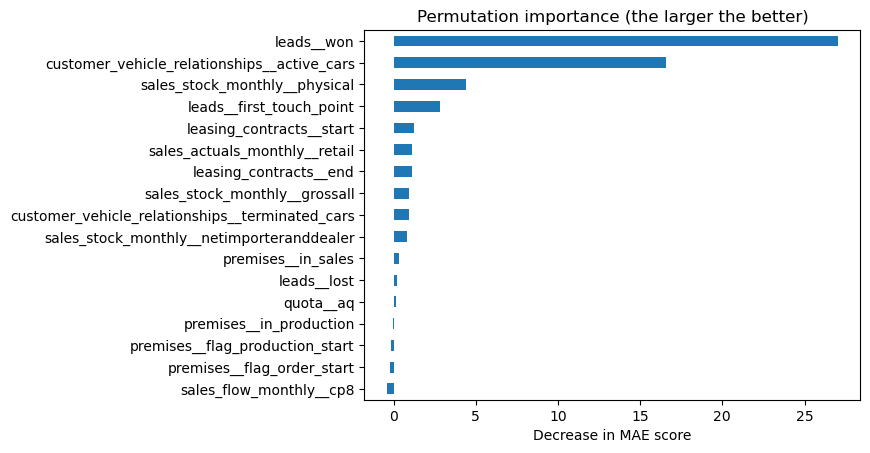

In [17]:
feature_importance_df = pd.Series(np.mean(importances_mean, axis=0), index=X_in.columns).sort_values(ascending=True)
feature_importance_df.plot.barh()
plt.title("Permutation importance (the larger the better)")
plt.xlabel("Decrease in MAE score")
plt.plot()

In [18]:
vehicle_group_list = [f'{i:02}' for i in range(1, 65)]
country_list = [f'Country {name}' for name in ['A', 'B', 'C', 'D']]
print(vehicle_group_list)
print(country_list)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64']
['Country A', 'Country B', 'Country C', 'Country D']


customer_vehicle_relationships__active_cars    0.734878
leads__won                                     0.828345
leads__first_touch_point                       0.663345
leads__lost                                    0.395934
dtype: float64


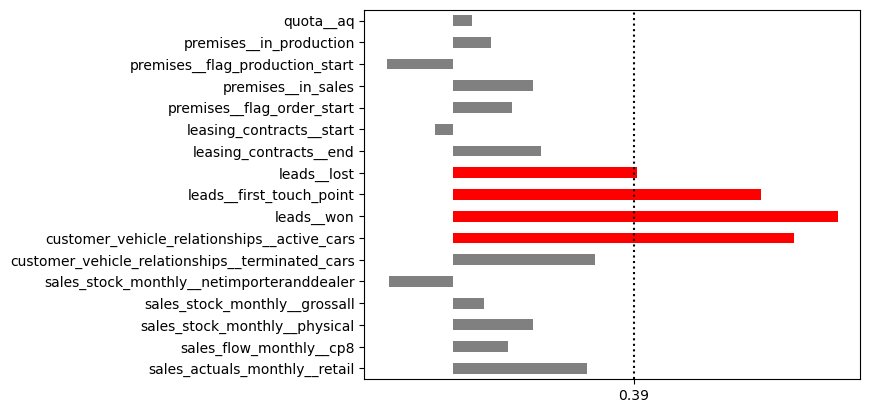

In [19]:
in_correlation = X_in.corrwith(y)
print(in_correlation[abs(in_correlation) > 0.39])
colors = ['red' if abs(val) > 0.39 else 'grey' for val in in_correlation]
ax = in_correlation.plot.barh(color=colors)
ax.axvline(x=0.39, color='black', linestyle='dotted')
ax.set_xticks([0.39])
yticks = ax.get_yticklabels()
ytick_labels = [label.get_text().replace("__vehiclegroup01__", "_") for label in yticks]
ax.set_yticklabels(ytick_labels)
plt.show()

## External features

In [20]:
# X_ex = external_data.iloc[non_na_data.index,:].drop(columns=['month'])

# importances_mean = []
# importances_std = []
# for i, (train_index, test_index) in enumerate(tscv.split(X_ex, y)):
#     print(train_index, test_index)
#     X_train, y_train = X_ex.iloc[train_index], y.iloc[train_index]
#     X_val, y_val = X_ex.iloc[test_index], y.iloc[test_index]
#     model = XGBRegressor().fit(X_train, y_train)
#     result = permutation_importance(
#         model,
#         X_val,
#         y_val,
#         n_repeats=10,
#         scoring='neg_mean_absolute_error', # neg_mean_absolute_percentage_error
#         random_state=0
#     )

#     importances_mean.append(result.importances_mean)
#     importances_std.append(result.importances_std)

# feature_importance_df = pd.Series(np.mean(importances_mean, axis=0), index=X_ex.columns).sort_values(ascending=True)[:20]
# feature_importance_df.plot.barh()
# plt.title("Permutation importance (the larger the better)")
# plt.xlabel("Decrease in MAE score")
# plt.plot()

In [21]:
# ex_correlation = X_ex.corrwith(y)
# plt.figure(figsize=(15, 6))
# ex_correlation.plot.box(vert=False)
# plt.show()

The middle 50% of the data (interquartile range) has value smaller quite small. We visualize only features with correlation larger than +-0.4

In [22]:
# large_corr_ex_features = ex_correlation[abs(ex_correlation) > 0.4]
# print(large_corr_ex_features)

In [23]:
# plt.barh(large_corr_ex_features.index, large_corr_ex_features.values)
# plt.show()

## Visualize number of features for each vehicle group

In [24]:
# vec_dict = {}
# for veh in vehicle_group_list:
#     vec_dict[veh] = len(internal_data.filter(regex=f"vehiclegroup{veh}").columns)

# df_temp = pd.DataFrame(vec_dict.items(), columns=['Vehicle group', 'No. of features'])

# plt.figure(figsize=(14, 7), facecolor='white')
# colors = ['red' if i in [49, 52, 55] else 'grey' for i in range(1, len(df_temp)+1)]
# colors[:6] = ["lightblue"] * 6
# plt.bar(df_temp['Vehicle group'], df_temp['No. of features'], color=colors, edgecolor='none')
# plt.axhline(y=5, xmax=0.82, color='black', linestyle='dotted')

# plt.xlabel('Vehicle group', fontsize=15)
# plt.ylabel('No. of features', fontsize=15)
# plt.title('Number of features for each vehicle group', fontsize=25)
# plt.xticks(["01", "06"] + ["49", "52", "55"], fontsize=10)
# plt.yticks([5,15,18], fontsize=15)
# plt.tight_layout()
# plt.box(False)
# plt.savefig("../img/vehicle_vs_internal_features.png", bbox_inches='tight')
# plt.show()